In [1]:
from Astrophysics_Tools.FindNumberOfGroups import FindNumGroups
from Astrophysics_Tools.File_Tools import Find_File_Types, Get_Contrast_Separation_From_Calcon
import pandas as pd
from itertools import product


# Example note book for functions

## Find Number of Groups to Mask (Cheap and Dirty Solution)

### Single File

In [2]:


#Single File Example
RefFile = '/Users/ajames/Documents/JWST Data/GO2538/GJ14/uncal/jw02538004001_04101_00009_mirimage_uncal.fits'
SciFile = '/Users/ajames/Documents/JWST Data/GO2538/GJ14/uncal/jw02538003001_04101_00001_mirimage_uncal.fits'

# Had intientions to make this work for when the Science file is brighter but I dont think I did 
IsSciBrighter = False

# KernelPix is the size of the kernel in pixels, this is used to determine how many groups to mask
# Default is 15 Pixels - I havent tested this with other values, but it does change dramatically
KernelPix = 15

# Method is the method used to determine the number of groups to mask, there are a few options:
    # MaxPixel : Compares the two images to see when the max pixel has the same counts
        # This is honestly a terrible idea, as it is very sensitive to cosmic rays
    # Summed : Sums all the values in the kernel, and matches this value
    # Nan : an argument passed onto Summed (Summed+Nan) to ignore values below half the max pixel count (Used to better focus on the lobes of the Miri images.)
Method = "Summed+Nan"

FindNumGroups(RefFile, SciFile, IsSciBrighter, KernelPix, Method)

Optiimized Groups using Summed+Nan is: 215


215

### Multi File Example

In [ ]:
root_path = '/Users/ajames/Documents/JWST Data/GO2538/GJ14/uncal/'
background_files, science_files, reference_files, target_acquisition_files = Find_File_Types(root_path, file_types=["Background", "Science", "Reference", "TA"], verbose=False)

df = pd.DataFrame({}, index=science_files, columns=reference_files)
for i_Science, i_Reference in product(range(len(science_files)), range(len(reference_files))):
    groups_to_mask = FindNumGroups(reference_files[i_Reference], science_files[i_Science], IsSciBrighter=False, KernelPix=15, Method="Summed+Nan", verbose=False)
    df.at[science_files[i_Science], reference_files[i_Reference]] = groups_to_mask

display(df)


Found 4 background files.
Found 2 science files.
Found 9 reference files.
Found 6 target acquisition files.


,/Users/ajames/Documents/JWST Data/GO2538/GJ14/uncal/jw02538004001_04101_00009_mirimage_uncal.fits,/Users/ajames/Documents/JWST Data/GO2538/GJ14/uncal/jw02538004001_04101_00008_mirimage_uncal.fits,/Users/ajames/Documents/JWST Data/GO2538/GJ14/uncal/jw02538004001_04101_00001_mirimage_uncal.fits,/Users/ajames/Documents/JWST Data/GO2538/GJ14/uncal/jw02538004001_04101_00002_mirimage_uncal.fits,/Users/ajames/Documents/JWST Data/GO2538/GJ14/uncal/jw02538004001_04101_00003_mirimage_uncal.fits,/Users/ajames/Documents/JWST Data/GO2538/GJ14/uncal/jw02538004001_04101_00005_mirimage_uncal.fits,/Users/ajames/Documents/JWST Data/GO2538/GJ14/uncal/jw02538004001_04101_00004_mirimage_uncal.fits,/Users/ajames/Documents/JWST Data/GO2538/GJ14/uncal/jw02538004001_04101_00007_mirimage_uncal.fits,/Users/ajames/Documents/JWST Data/GO2538/GJ14/uncal/jw02538004001_04101_00006_mirimage_uncal.fits
/Users/ajames/Documents/JWST Data/GO2538/GJ14/uncal/jw02538003001_04101_00001_mirimage_uncal.fits,215,253,384,297,377,292,348,207,299
/Users/ajames/Documents/JWST Data/GO2538/GJ14/uncal/jw02538002001_04101_00001_mirimage_uncal.fits,363,383,486,455,499,430,492,347,418


loading /Users/ajames/Documents/Notebooks/WorkingKLIP/NewMIRI_HD202628/spaceklip_0/calcon/ADI+RDI_NANNU1_NSUBS1_JWST_MIRI_MIRIMAGE_F1140C_NONE_4QPM_1140_MASK1140-KLmodes-all_cal_maskcons.npy
loading /Users/ajames/Documents/Notebooks/WorkingKLIP/NewMIRI_HD202628/spaceklip_0/calcon/ADI+RDI_NANNU1_NSUBS1_JWST_MIRI_MIRIMAGE_F1140C_NONE_4QPM_1140_MASK1140-KLmodes-all_cal_seps.npy


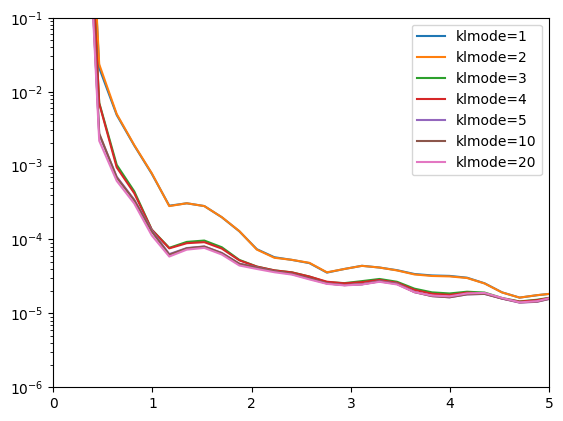

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
ax.set_yscale("log")
ax.set_xscale("linear")
ax.set_ylim(1e-6,1e-1)
ax.set_xlim(0, 5)
Contrast, Separation, KLModes = Get_Contrast_Separation_From_Calcon("/Users/ajames/Documents/Notebooks/WorkingKLIP/NewMIRI_HD202628/spaceklip_0/calcon")
for contrast, separation, klmode in zip(Contrast, Separation, KLModes):
    ax.plot(separation, contrast, label = f"{klmode=}")

plt.legend()